In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Funciones auxiliares generales
def filtrar_outliers(df, columna, p_inf=0.01, p_sup=0.99):
    """Filtra valores extremos de una columna numérica usando percentiles."""
    lim_inf = df[columna].quantile(p_inf)
    lim_sup = df[columna].quantile(p_sup)
    return df[df[columna].between(lim_inf, lim_sup)]

# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df


In [3]:
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)

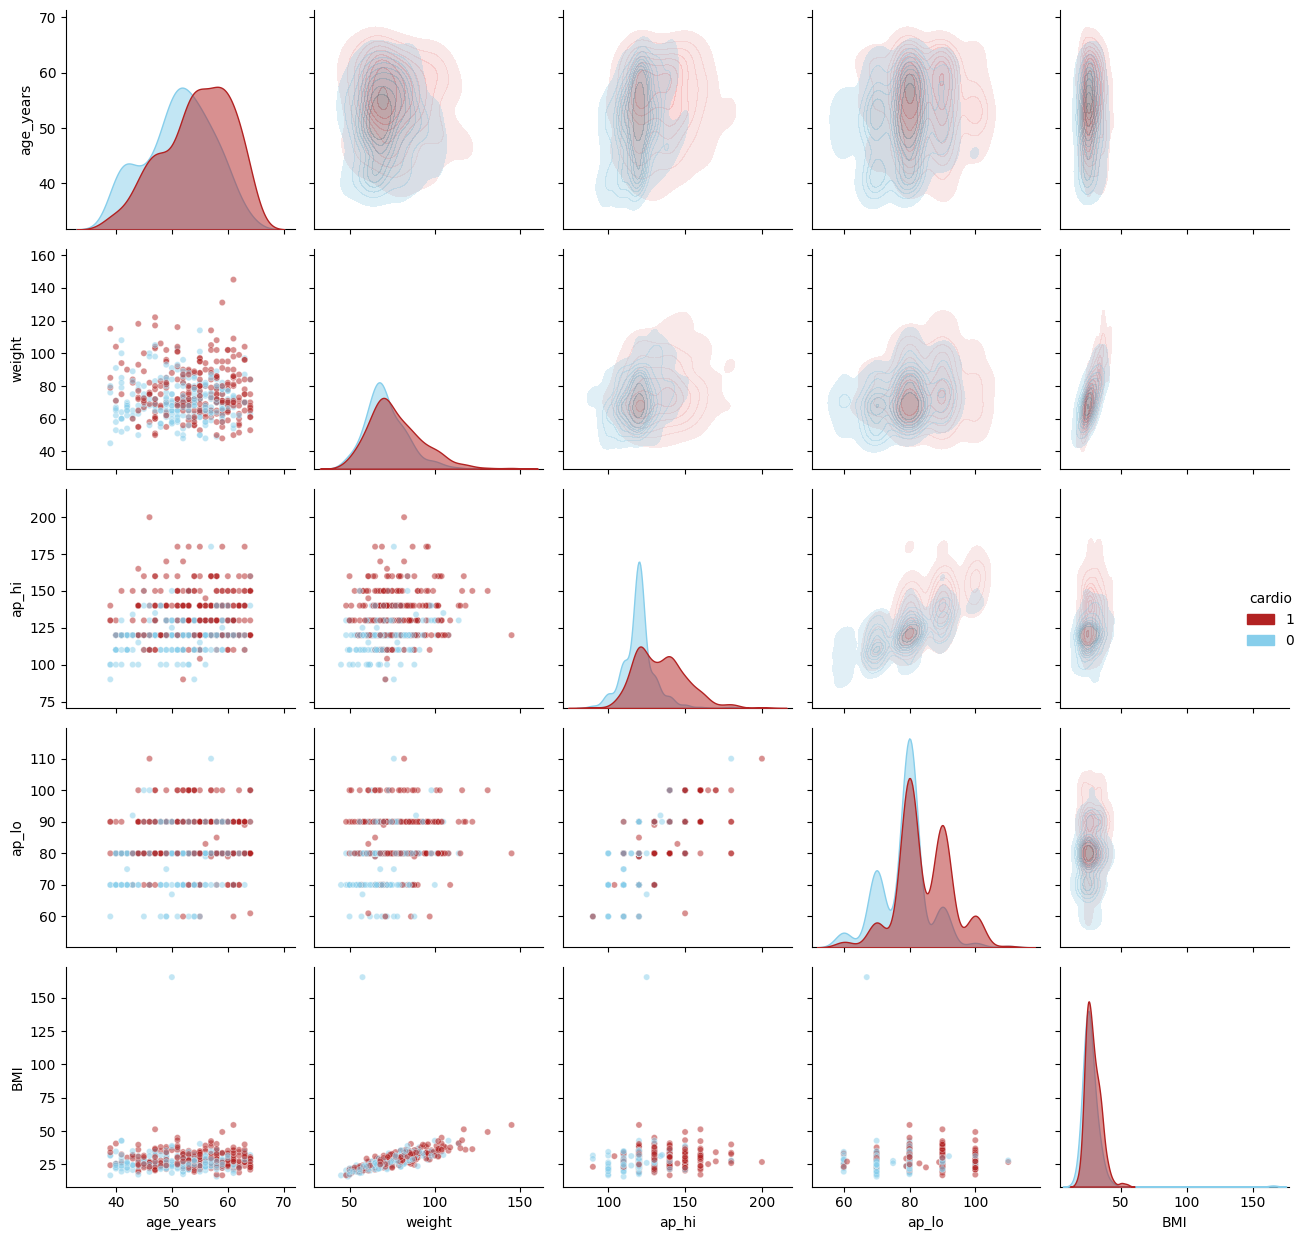

In [4]:
# Variables numéricas relevantes
variables = ["age_years", "weight", "ap_hi", "ap_lo", "BMI"]

# Filtrado clínico + muestreo
df_filtrado = df[
    (df["weight"] >= 40) & (df["weight"] <= 150) &
    (df["ap_hi"] >= 90) & (df["ap_hi"] <= 200) &
    (df["ap_lo"] >= 40) & (df["ap_lo"] <= 130)
].copy()

df_filtrado["cardio"] = df_filtrado["cardio"].astype(str)
df_filtrado = df_filtrado.sample(500, random_state=42)

# Crear PairGrid
g = sns.PairGrid(df_filtrado, vars=variables, hue="cardio", palette={"0": "skyblue", "1": "firebrick"})

# Personalizar cada sección
g.map_diag(sns.kdeplot, fill=True, alpha=0.5)
g.map_lower(sns.scatterplot, alpha=0.5, s=20)
g.map_upper(sns.kdeplot, fill=True, alpha=0.3)

# Agregar leyenda y mostrar
g.add_legend()
plt.tight_layout()
plt.show()
